# Análise dos Acidentes de Trânsito e suas Condições Metereológicas

## Projeto da disciplina **SSC0957 - Práticas em Ciência de Dados II**

* Alexandre Eduardo de Souza Jesus - alexandre_souza@usp.br - 12559506

* Gustavo Silva de Oliveira - guspfc03@usp.br - 12567231

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - 125599472

---

## 1. Introdução

## 2. Metodologia

## 3. Compreensão dos Dados

### 3.1. Coleta de Dados

O conjunto de dados utilizado para a análise do problema foi coletado no site do Governo Federal, disponível em [Acidentes](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes). Os dados foram coletados e registrados pela Polícia Rodoviária Federal, agrupado por ocorrências de 2007 até fevereiro de 2023.

### 3.2. Dicionário de Dados

* **data_inversa**: Data da ocorrência no formato *mm/dd/aaaa*;

* **dia_semana**: Dia da semana da ocorrência;

* **horario**: Horário da ocorrência no formato *hh:mm:ss*;

* **uf**: Unidade da federação;

* **municipio**: Nome do município de ocorrência do acidente;

* **causa_acidente**: Identificação da causa principal do acidente;

* **tipo_acidente**: Identificação do tipo de acidente;

* **classificação_acidente**: Classificação quanto à gravidade do acidente;

* **sentido_via**: Sentido da via considerando o ponto de colisão;

* **condição_metereologica**: Condição metereológica no momento do acidente;

* **tipo_pista**: Tipo da pista considerando a quantidade de faixas;

* **tracado_via**: Descrição do traçado da via;

* **uso_solo**: Descrição sobre as características do local do acidente, em que "Sim" significa "Urbano" e "Não" significa "Rural". O tipo de solo "Urbano" caracteriza os trechos de rodovia que estão compreendidos em áreas edificadas, ou seja, áreas públicas ou privadas em que se é possível realizar construções. Por outro lado, o tipo de solo "Rural" refere-se ao oposto disso. Em suma, caso o local do acidente seja dentro de uma cidade, ele será caracterizado como "Urbano", e caso ele tenha ocorrido em locais onde não há área construída no entorno da rodovia, ele será caracterizado como "Rural".;

* **latitude**: Latitude do local do acidente em formato geodésico decimal;

* **longitude**: Longitude do local do acidente em formato geodésico decimal;

* **pessoas**: Total de pessoas envolvidas na ocorrência;

* **mortos**: Total de pessoas mortas envolvidas na ocorrência;

* **feridos_leves**: Total de pessoas com ferimentos leves envolvidas na ocorrência;

* **feridos**: Total de pessoas feridas envolvidas na ocorrência;

* **ilesos**: Total de pessoas ilesas envolvidas na ocorrência;

* **ignorados**: Total de pessoas envolvidas na ocorrência e que não se soube o estado físico;

* **veiculos**: Total de veículos envolvidos na ocorrência;

### 3.3. Tipo das Variáveis

## 4. Tratamento dos Dados

In [49]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [2]:
# Leitura dos dados de 2022
datatran_df = pd.read_csv("data/datatran_2022.csv")
datatran_df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,1/1/2022,sábado,1:35:00,PI,316.0,415.0,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,1,0,1,2,-7.432800,-40.682619,SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,1/1/2022,sábado,2:40:00,PR,116.0,33.0,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,0,1,1,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,1/1/2022,sábado,5:22:00,MS,163.0,393.0,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,-21.228445,-54.456296,SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,1/1/2022,sábado,7:00:00,RJ,101.0,457.0,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,1,0,1,2,-23.031498,-44.177153,SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,1/1/2022,sábado,9:00:00,MG,40.0,508.3,RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,3,0,0,1,-19.760612,-44.134754,SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [3]:
# Dropando colunas desinteressantes à análise
datatran_df.drop(columns = ['uop','delegacia','regional','br', 'km', 'id'], inplace = True)

In [4]:
# Nenhuma ocorrência com valor NaN
datatran_df[datatran_df.isna().any(axis=1)]

,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude


In [5]:
# Quantidade de ocorrências registradas em 2022
len(datatran_df)

64547

## 5. Análise Exploratória dos Dados

In [6]:
# Coletando Acidentes que possuem como causa principal a Chuva
df_chuva = datatran_df[datatran_df['causa_acidente'] == 'Chuva']
df_chuva.head()

,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
6,1/1/2022,sábado,10:20:00,MG,CAETANOPOLIS,Chuva,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,Crescente,...,3,0,1,0,2,0,1,2,-19.333821,-44.361079
29,1/2/2022,domingo,16:00:00,DF,BRASILIA,Chuva,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,...,3,0,1,0,2,0,1,2,-15.943619,-48.172115
72,1/3/2022,segunda-feira,21:15:00,MG,SANTANA DO PARAISO,Chuva,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,...,3,0,2,0,1,0,2,2,-19.388008,-42.476167
175,1/6/2022,quinta-feira,15:05:00,ES,DOMINGOS MARTINS,Chuva,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,...,5,0,0,4,1,0,4,2,-20.380268,-40.630009
183,1/6/2022,quinta-feira,17:50:00,GO,TEREZOPOLIS DE GOIAS,Chuva,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,...,3,0,1,0,2,0,1,1,-16.478900,-49.086400


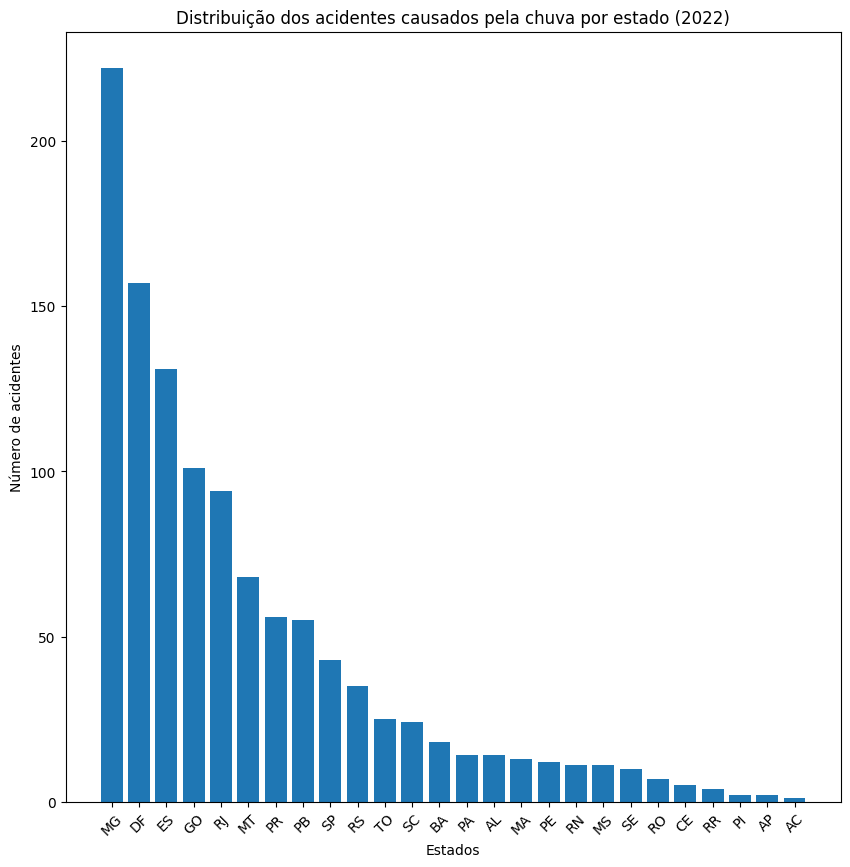

In [20]:
plt.figure(figsize=(10, 10))
plt.bar(df_chuva['uf'].unique(), df_chuva['uf'].value_counts())
plt.title('Distribuição dos acidentes causados pela chuva por estado (2022)')
plt.xlabel('Estados')
plt.ylabel('Número de acidentes')
plt.xticks(rotation = 45)
plt.show()

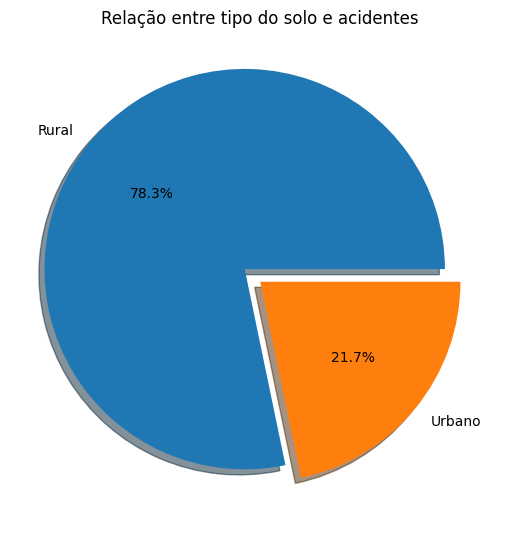

In [60]:
tipo_solo = lambda x: 'Urbano' if x == 'Sim' else 'Rural'
df_chuva.loc[:, 'solo'] = df_chuva['uso_solo'].apply(tipo_solo)

plt.figure(figsize=(6.5, 6.5))
plt.title('Relação entre tipo do solo e acidentes')
plt.pie(df_chuva['solo'].value_counts(), explode = (0.1, 0), labels=df_chuva['solo'].unique(), autopct='%1.1f%%', shadow=True)
plt.show()

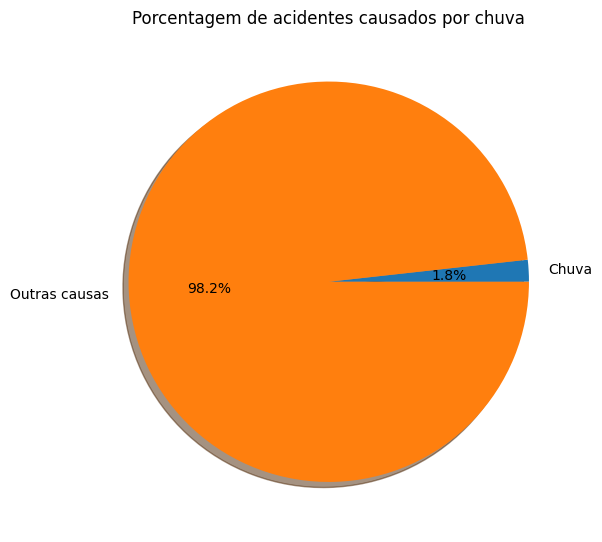

In [83]:
percentages = datatran_df.causa_acidente.value_counts(normalize=True)
rain_percentage = percentages['Chuva']
all_percentages = np.sum(percentages.drop('Chuva'))

plt.figure(figsize=(6.5, 6.5))
plt.title('Porcentagem de acidentes causados por chuva')
plt.pie([rain_percentage, all_percentages], labels=['Chuva', 'Outras causas'], autopct='%1.1f%%', shadow=True)
plt.show()

In [24]:
df_chuva['solo'].value_counts()

Rural     888
Urbano    247
Name: solo, dtype: int64

In [8]:
df_chuva['tipo_acidente'].value_counts()

Saída de leito carroçável         458
Colisão com objeto                151
Tombamento                        108
Capotamento                        93
Colisão traseira                   84
Queda de ocupante de veículo       74
Colisão frontal                    64
Colisão lateral mesmo sentido      34
Colisão transversal                17
Colisão lateral sentido oposto     17
Eventos atípicos                   14
Atropelamento de Pedestre          14
Engavetamento                       5
Derramamento de carga               2
Name: tipo_acidente, dtype: int64

In [9]:
df_chuva['classificacao_acidente'].value_counts()

Com Vítimas Feridas    906
Sem Vítimas            176
Com Vítimas Fatais      53
Name: classificacao_acidente, dtype: int64

In [10]:
df_chuva['tipo_pista'].value_counts()

Dupla       579
Simples     487
Múltipla     69
Name: tipo_pista, dtype: int64

In [11]:
df_chuva['tracado_via'].value_counts()

Reta                     517
Curva                    409
Não Informado            144
Desvio Temporário         40
Rotatória                  8
Interseção de vias         8
Retorno Regulamentado      3
Túnel                      2
Ponte                      2
Viaduto                    2
Name: tracado_via, dtype: int64

In [12]:
df_chuva['sentido_via'].value_counts()

Crescente        627
Decrescente      507
Não Informado      1
Name: sentido_via, dtype: int64

In [13]:
df_chuva['fase_dia'].value_counts()

Pleno dia      651
Plena Noite    357
Amanhecer       65
Anoitecer       62
Name: fase_dia, dtype: int64

In [14]:
# Sol?
df_chuva['condicao_metereologica'].value_counts()

Chuva               1026
Garoa/Chuvisco        72
Nublado               18
Céu Claro             14
Nevoeiro/Neblina       3
Sol                    1
Granizo                1
Name: condicao_metereologica, dtype: int64